### Import the Libraries

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Q1. Import the cifar10 dataset from ‘keras.datasets’. Perform all the data preprocessing required

### Load the Dataset and Prepare testing and training data

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Change the Datatype to Float and Normalize it

In [5]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [6]:
x_train.dtype


dtype('float64')

In [7]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


### Do the one hot Encoding of the Dependent Variable using Keras.utils

In [8]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [9]:
num_classes= len(np.unique(y_train))

In [10]:
num_classes

10

In [11]:
print(y_train)
len(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [12]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


### Divide the Training Dataset into  validation and Training

In [13]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [14]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [15]:
print(y_valid.shape)
print(x_valid.shape)


(5000, 10)
(5000, 32, 32, 3)


## Q2. Build a CNN architecture with Keras and stack an ANN on top of CNN

### Import the Deep Learning Libraries

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


### Build a CNN Architecture with Keras

In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

In [19]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))



In [20]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [22]:
model.add(Flatten())

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

### Stack an ANN on top of CNN

In [24]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [25]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [26]:
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [27]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

### Fit the model

In [29]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=10,verbose=2,batch_size=500)

Epoch 1/10
90/90 - 33s - loss: 2.1373 - accuracy: 0.1631 - val_loss: 1.9371 - val_accuracy: 0.2326 - 33s/epoch - 366ms/step
Epoch 2/10
90/90 - 27s - loss: 1.8509 - accuracy: 0.2676 - val_loss: 1.7792 - val_accuracy: 0.2968 - 27s/epoch - 302ms/step
Epoch 3/10
90/90 - 26s - loss: 1.6996 - accuracy: 0.3410 - val_loss: 1.6278 - val_accuracy: 0.3696 - 26s/epoch - 287ms/step
Epoch 4/10
90/90 - 26s - loss: 1.5982 - accuracy: 0.3907 - val_loss: 1.6379 - val_accuracy: 0.3774 - 26s/epoch - 291ms/step
Epoch 5/10
90/90 - 27s - loss: 1.5234 - accuracy: 0.4290 - val_loss: 1.4911 - val_accuracy: 0.4504 - 27s/epoch - 296ms/step
Epoch 6/10
90/90 - 26s - loss: 1.4634 - accuracy: 0.4532 - val_loss: 1.4449 - val_accuracy: 0.4626 - 26s/epoch - 292ms/step
Epoch 7/10
90/90 - 27s - loss: 1.4086 - accuracy: 0.4817 - val_loss: 1.4074 - val_accuracy: 0.4894 - 27s/epoch - 303ms/step
Epoch 8/10
90/90 - 27s - loss: 1.3531 - accuracy: 0.5026 - val_loss: 1.3460 - val_accuracy: 0.5136 - 27s/epoch - 298ms/step
Epoch 9/

## Q3. Fit and evaluate the model. Plot the training and validation curves.


### Evaluate the Results

In [32]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 1.3038 - accuracy: 0.5253


In [33]:
results

[1.3038451671600342, 0.5253000259399414]

In [34]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

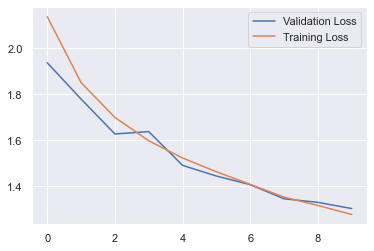

In [35]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend();

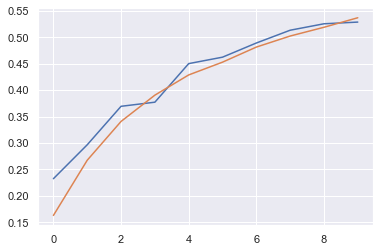

In [36]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;